## Linear regression as limiting case of Ridge regression

#### Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. 

In [1]:
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
# importing the r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
working_df = pd.read_csv(Path('Covid-19/FINAL_DATABASE.csv'))
working_df.head(5)

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,NaN,NaN
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,NaN,NaN
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,NaN,NaN
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,NaN,NaN
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,NaN,NaN


In [3]:
working_df['Covid_New_Cases'] = working_df['Covid_New_Cases'].replace(np.nan, 0)
working_df['Covid_Death'] = working_df['Covid_Death'].replace(np.nan, 0)
working_df.head()

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,0.0,0.0
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,0.0,0.0
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,0.0,0.0
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,0.0,0.0
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,0.0,0.0


In [4]:
# Split our preprocessed data into our features and target arrays
y = working_df.UNEMPLOYMENT
X = working_df.drop(columns=["Date","UNEMPLOYMENT"])

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
len(X_test)


16

In [6]:
len(y_test)

16

In [7]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# plot_df = working_df.merge(X_train_scaled, )
# main_df = unemployment_df.merge(stocks_df, on='Date', how='outer')
# main_df.head(5)

In [9]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
rr = Ridge(alpha=0.01) 

In [11]:
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles

In [12]:
rr.fit(X_train_scaled, y_train)

Ridge(alpha=0.01)

In [13]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train_scaled, y_train)

Ridge(alpha=100)

In [14]:
train_score=lr.score(X_train_scaled, y_train)
test_score=lr.score(X_test_scaled, y_test)
# score=r2_score(y_test,y_pred)

In [15]:
print('train score is', train_score)
print('test score is', test_score)


train score is 0.7179951292992881
test score is -7.29995289807103


In [16]:
Ridge_train_score = rr.score(X_train_scaled,y_train)
Ridge_test_score = rr.score(X_test_scaled, y_test)

In [17]:
print('Ridge train score is', Ridge_train_score)
print('Ridge test score is', Ridge_test_score)


Ridge train score is 0.7179615509985529
Ridge test score is -7.32247881800931


In [18]:
Ridge_train_score100 = rr100.score(X_train_scaled,y_train)
Ridge_test_score100 = rr100.score(X_test_scaled, y_test)

In [19]:
print('Ridge_train_score100 is', Ridge_train_score100)
print('Ridge_test_score100', Ridge_test_score100)


Ridge_train_score100 is 0.34219119752413274
Ridge_test_score100 -0.0562530592601056


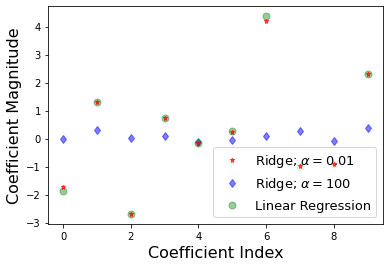

In [20]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In [21]:
# plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 

In [22]:
# plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

In [23]:
# plt.xlabel('Coefficient Index',fontsize=16)
# plt.ylabel('Coefficient Magnitude',fontsize=16)
# plt.legend(fontsize=13,loc=4)
# plt.show()

### Lasso

In [24]:
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected

In [25]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
working_df = pd.read_csv(Path('Covid-19/FINAL_DATABASE.csv'))
working_df.head(5)

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,NaN,NaN
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,NaN,NaN
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,NaN,NaN
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,NaN,NaN
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,NaN,NaN


In [27]:
working_df['Covid_New_Cases'] = working_df['Covid_New_Cases'].replace(np.nan, 0)
working_df['Covid_Death'] = working_df['Covid_Death'].replace(np.nan, 0)
working_df.head()

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,0.0,0.0
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,0.0,0.0
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,0.0,0.0
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,0.0,0.0
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,0.0,0.0


In [28]:
# Split our preprocessed data into our features and target arrays
y = working_df.UNEMPLOYMENT
X = working_df.drop(columns=["Date","UNEMPLOYMENT"])

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=42)

In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
train_score=lasso.score(X_train_scaled,y_train)
test_score=lasso.score(X_test_scaled,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [32]:
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.2070408665473248
test score:  -0.14795721624342395
number of features used:  2


In [33]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train_scaled,y_train)

Lasso(alpha=0.01, max_iter=1000000.0)

In [34]:
train_score001=lasso001.score(X_train_scaled,y_train)
test_score001=lasso001.score(X_test_scaled,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)


In [35]:
print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.7110839779310338
test score for alpha =0.01:  -7.378186738640887
number of features used: for alpha =0.01: 9


In [36]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train_scaled,y_train)

Lasso(alpha=0.0001, max_iter=1000000.0)

In [37]:
train_score00001=lasso00001.score(X_train_scaled,y_train)
test_score00001=lasso00001.score(X_test_scaled,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)


In [38]:
print("training score for alpha=0.0001:", train_score00001) 
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.717994314369035
test score for alpha =0.0001:  -7.301145407835907
number of features used: for alpha =0.0001: 10


In [39]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr_train_score=lr.score(X_train_scaled,y_train)
lr_test_score=lr.score(X_test_scaled,y_test)

In [40]:
print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)

LR training score: 0.7179951292992881
LR test score:  -7.29995289807103


In [41]:
# importing the r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 score is', score)
print("mean_squared_error is ==",mean_squared_error(y_test, y_pred))
print("root_mean_squared error is ==",np.sqrt(mean_squared_error(y_test, y_pred)))

NameError: name 'y_pred' is not defined

In [ ]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)

In [ ]:
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

## Multiple linear regression

In [42]:
working_df = pd.read_csv(Path('Covid-19/FINAL_DATABASE.csv'))
working_df.head(5)

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,NaN,NaN
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,NaN,NaN
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,NaN,NaN
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,NaN,NaN
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,NaN,NaN


In [43]:
working_df['Covid_New_Cases'] = working_df['Covid_New_Cases'].replace(np.nan, 0)
working_df['Covid_Death'] = working_df['Covid_Death'].replace(np.nan, 0)
working_df.head()

,Date,S_P Close,S_P Volume,Median Sale Price,Homes Sold,INFLATION_EXPECTATION,SALES,UNEMPLOYMENT,NAS Value,NAS Volume,Covid_New_Cases,Covid_Death
0,1/1/2017,2278.87,42691599000,246000,360977,2.6,368960,4.7,5614.786,8376144160,0.0,0.0
1,2/1/2017,2363.64,40740785000,247000,369081,2.7,365480,4.6,5825.438,8563523411,0.0,0.0
2,3/1/2017,2362.72,47262643000,257000,533610,2.5,422891,4.4,5911.738,10998962695,0.0,0.0
3,4/1/2017,2384.20,37735945000,262000,516823,2.5,407165,4.4,6047.606,8302492073,0.0,0.0
4,5/1/2017,2411.80,44654185000,269000,630788,2.6,434450,4.4,6198.517,10239273745,0.0,0.0


In [44]:
# Split our preprocessed data into our features and target arrays
y = working_df.UNEMPLOYMENT
X = working_df.drop(columns=["Date","UNEMPLOYMENT"])

In [45]:
X.shape

(62, 10)

In [46]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [47]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)


LinearRegression()

In [49]:
# Predicting the Test set results
y_pred = regressor.predict(X_test_scaled)
y_pred

array([ 7.47001995,  7.90333541,  3.84037407,  8.15426184,  4.82387318,
       13.50302494,  4.82860708,  4.10677316,  2.98940406,  6.71223062,
        3.60178448,  4.51039485, 12.81126559,  4.16142036,  3.61943084,
        3.05337007])

In [50]:
# importing the r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 score is', score)
print("mean_squared_error is ==",mean_squared_error(y_test, y_pred))
print("root_mean_squared error is ==",np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score is -7.29995289807103
mean_squared_error is == 7.744569331102451
root_mean_squared error is == 2.782906633558239


In [ ]:
# You can see that the accuracy score is greater than 0.8 it means we can use this model  
# to solve multiple linear regression, and also mean squared error rate is also low. NOPE -ours is sky high.